# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [9]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic.csv', index_col=0)

Use the `.info()` method to quickly preview which features have missing data

In [4]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1391 entries, 1.0 to 839.0
Data columns (total 11 columns):
Survived    1391 non-null float64
Pclass      1391 non-null object
Name        1391 non-null object
Sex         1391 non-null object
Age         1209 non-null float64
SibSp       1391 non-null float64
Parch       1391 non-null float64
Ticket      1391 non-null object
Fare        1391 non-null float64
Cabin       602 non-null object
Embarked    1289 non-null object
dtypes: float64(5), object(6)
memory usage: 130.4+ KB


In [54]:
df.describe()

,Survived,Age,SibSp,Parch,Fare
count,1391.000000,1209.000000,1391.000000,1391.000000,1391.000000
mean,0.381021,29.731894,1.399712,1.141625,32.145048
std,0.485812,16.070125,2.097919,1.771294,48.662200
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,27.000000,1.000000,0.000000,13.500000
75%,1.000000,40.000000,2.000000,2.000000,33.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

In [5]:
# Your code here
df['Age'].agg(['mean', 'median', 'std'])

mean      29.731894
median    27.000000
std       16.070125
Name: Age, dtype: float64

In [7]:
%matplotlib inline

In [11]:
plt.style.use('dark_background')

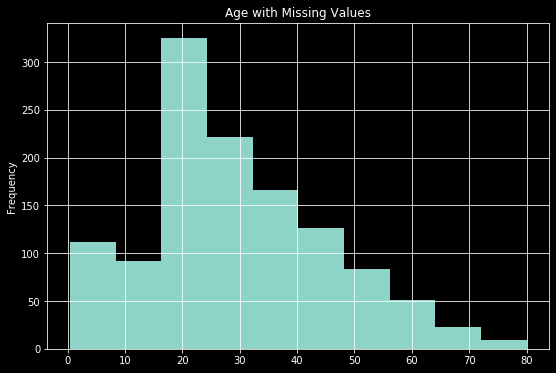

In [82]:
df['Age'].plot.hist(grid=True, figsize=(9, 6), title="Age with Missing Values")

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

In [68]:
# Your code here
new_df = df.fillna(value={ 'Age': df['Age'].mean()})

In [73]:
new_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       789
Embarked    102
dtype: int64

In [74]:
new_df['Age'].agg(['mean', 'median', 'std'])

mean      29.731894
median    29.731894
std       14.981155
Name: Age, dtype: float64

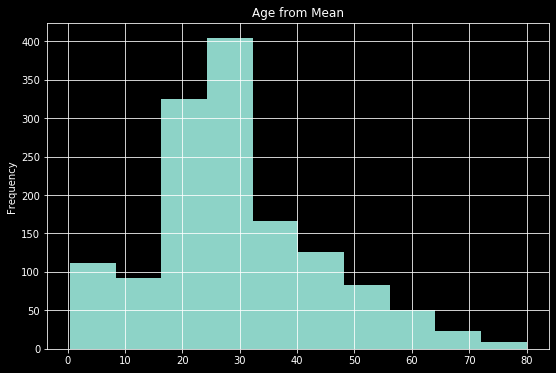

In [81]:
new_df['Age'].plot.hist(grid=True, figsize=(9, 6), title="Age from Mean")

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the media age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

In [77]:
# Your code here
new_df = df.fillna(value={ 'Age': df['Age'].median() })
new_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       789
Embarked    102
dtype: int64

In [78]:
new_df['Age'].agg(['mean', 'median', 'std'])

mean      29.374450
median    27.000000
std       15.009476
Name: Age, dtype: float64

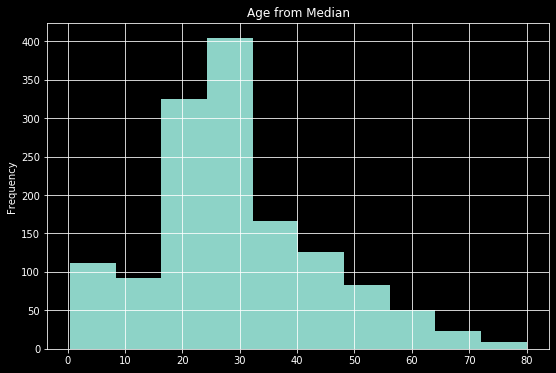

In [80]:
new_df['Age'].plot.hist(grid=True, figsize=(9, 6), title="Age from Median")

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

In [92]:
# Your code here
new_df = df.dropna(axis=0, subset=['Age'])

In [94]:
new_df['Age'].agg(['mean', 'median', 'std'])

mean      29.731894
median    27.000000
std       16.070125
Name: Age, dtype: float64

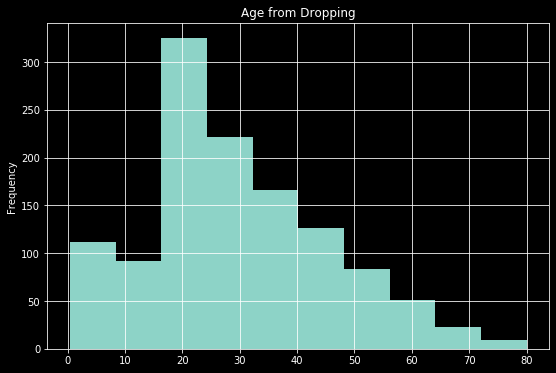

In [96]:
new_df['Age'].plot.hist(grid=True, figsize=(9, 6), title="Age from Dropping")

### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.